In [1]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans
import datetime

def getDf(name, start, end, interval):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=interval, start= start, end= end)

    df['Date'] = pd.to_datetime(df.index)
    df['Date'] = df['Date'].apply(mpl_dates.date2num)
    
    df['DateStr'] = df.index
    df['DateStr'] = df['DateStr'].apply(str)
    df['DateStr'] = df['DateStr'].str[5:-9]

    df['Id'] = range(0, len(df))
    df.set_index('Id', inplace=True)
    
    df = df.sort_values(by=['Volume'], ascending=False)
    df.insert(0, 'VolumeRank', range(0, len(df)))
    df = df.sort_index()

    df.sort_values("VolumeRank")
    df['Point'] = df[ df['VolumeRank']<5 ]['Open']

    return df


/Users/h/Documents/work-python/stock-support-resistance /my_env/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=10)
plt.tight_layout()

def getPlot(df, col):
    # make figure + axes
    fig, ax = plt.subplots(tight_layout=True)
    ax.set_xlabel( df['DateStr'][0]  + "  -  " +df['DateStr'][ len(df) - 1])
    ax.set_ylabel('Price')
                  
    xs = df.index
    ys = df['Open']
    ys_mark = df[col]

    # 'bo-' means blue color, round points, solid lines
    ax.plot(xs, ys, 'g-', ys_mark,'bo-')

    # zip joins x and y coordinates in pairs
    for i, y in zip(xs, ys_mark):
        if not y: continue
        label = "rank " + str(df['VolumeRank'][i]) + "\n" + \
                df['DateStr'][i] + \
                "\n(${:.2f},${:.2f})".format(df['Open'][i], df['Close'][i]) + \
                "\n" + str(df['Volume'][i])
        ax.annotate(label, # this is the text
                     (i, y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    plt.show()

<Figure size 864x504 with 0 Axes>

In [3]:
def getDate():
    today = str(datetime.datetime.today()).split()[0]
    today_7 = str(datetime.datetime.today()- datetime.timedelta(days=6)).split()[0]
    print(today, today_7)
    return today_7, today

In [8]:
name = "QQQ"
name = "TQQQ"
start, end = getDate()
# start="2021-11-01"
# end="2021-11-7"
df = getDf(name, start, end, '1m')
# df.head()

2021-11-15 2021-11-09


In [9]:
df.sort_values(by=['VolumeRank']).head()

,VolumeRank,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DateStr,Point
Id,,,,,,,,,,,
390,0,162.720001,162.940002,161.789993,162.699997,1952724,0,0,18941.604167,11-10 09:30,162.720001
780,1,162.750000,162.990005,162.360107,162.440399,1368381,0,0,18942.604167,11-11 09:30,162.750000
0,2,171.250000,171.779999,171.229996,171.419998,986056,0,0,18940.604167,11-09 09:30,171.250000
1170,3,161.809998,161.968796,161.610001,161.619995,730261,0,0,18943.604167,11-12 09:30,161.809998
28,4,166.000000,166.350006,165.960007,166.199997,716418,0,0,18940.623611,11-09 09:58,166.000000


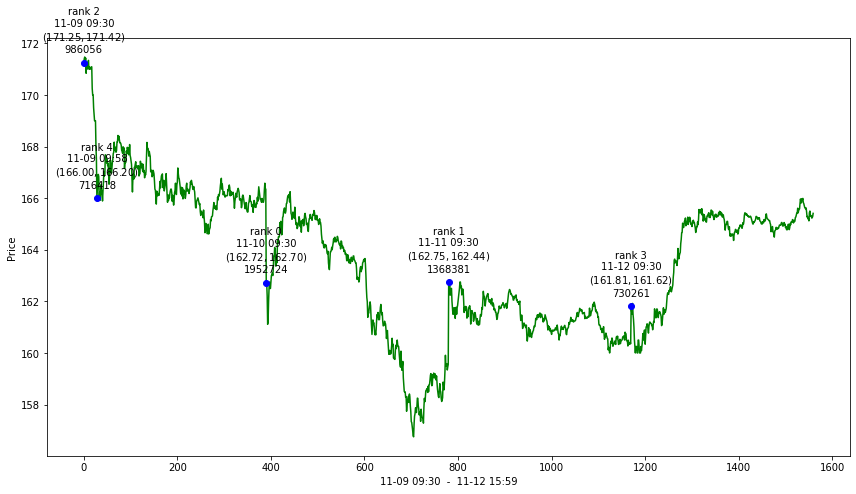

In [10]:
getPlot(df, "Point")

In [7]:
start="2021-11-01"
# end="2021-11-15"
end = None
df_ = getDf(name, start, end, '1h')
df_

,VolumeRank,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DateStr,Point
Id,,,,,,,,,,,
0,3,155.800003,156.110001,153.179993,154.679993,10554990,0,0,18932.562500,11-01 09:30,155.800003
1,27,154.660004,155.492004,153.770004,155.380005,4915648,0,0,18932.604167,11-01 10:30,NaN
2,53,155.389999,155.938400,155.190002,155.729996,3001127,0,0,18932.645833,11-01 11:30,NaN
3,42,155.740005,156.179993,154.953903,155.132095,3615964,0,0,18932.687500,11-01 12:30,NaN
4,40,155.139999,155.300003,153.781006,154.279999,3735413,0,0,18932.729167,11-01 13:30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68,60,164.800003,165.639999,164.395004,165.600006,2730482,0,0,18943.812500,11-12 14:30,NaN
69,47,165.589996,166.070007,165.104996,165.419998,3285013,0,0,18943.854167,11-12 15:30,NaN
70,4,166.910004,167.289993,164.419998,164.639999,10284416,0,0,18946.604167,11-15 09:30,166.910004


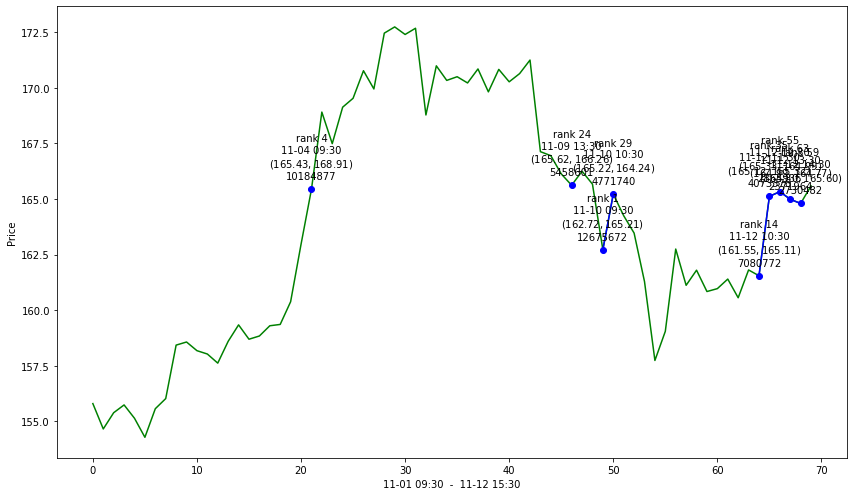

In [64]:
pointRank = 165
df_['Point_'] = df_[ (df_['Low'] < pointRank) & (pointRank < df_['High']) ]['Open']
getPlot(df_, "Point_")

<AxesSubplot:xlabel='Id'>

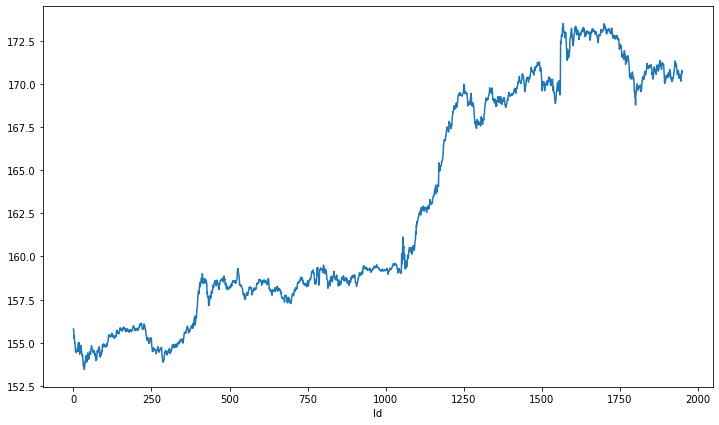

In [53]:
df_['Open'].plot()

In [7]:
df

,VolumeRank,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DateStr,Point
Id,,,,,,,,,,,
0,2,170.500000,170.740005,170.000000,170.380005,1017024,0,0,18939.604167,11-08 09:30,170.5
1,136,170.389999,170.919998,170.289993,170.910004,191995,0,0,18939.604861,11-08 09:31,NaN
2,455,170.889999,170.919998,170.520004,170.809998,118030,0,0,18939.605556,11-08 09:32,NaN
3,157,170.809998,171.110001,170.300003,170.880005,187738,0,0,18939.606250,11-08 09:33,NaN
4,188,170.750000,171.309998,170.750000,171.248993,174226,0,0,18939.606944,11-08 09:34,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1945,339,165.320007,165.360001,165.119995,165.210007,132705,0,0,18943.871528,11-12 15:55,NaN
1946,1463,165.228699,165.309998,165.199997,165.240005,44654,0,0,18943.872222,11-12 15:56,NaN
1947,1512,165.240005,165.320007,165.169998,165.279999,42008,0,0,18943.872917,11-12 15:57,NaN


<AxesSubplot:xlabel='Id'>

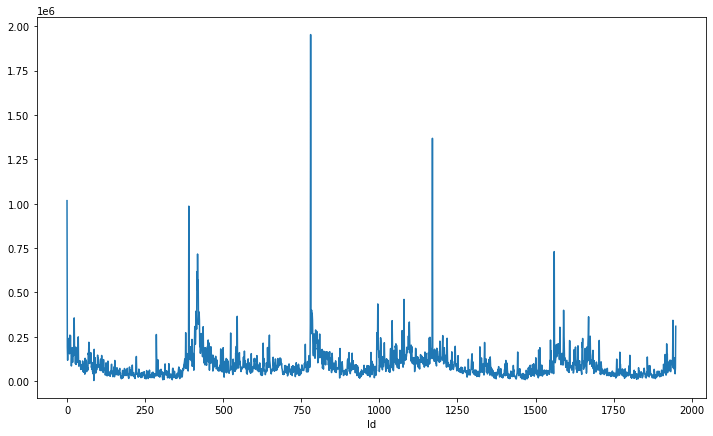

In [8]:
df['Volume'].plot()

<AxesSubplot:>

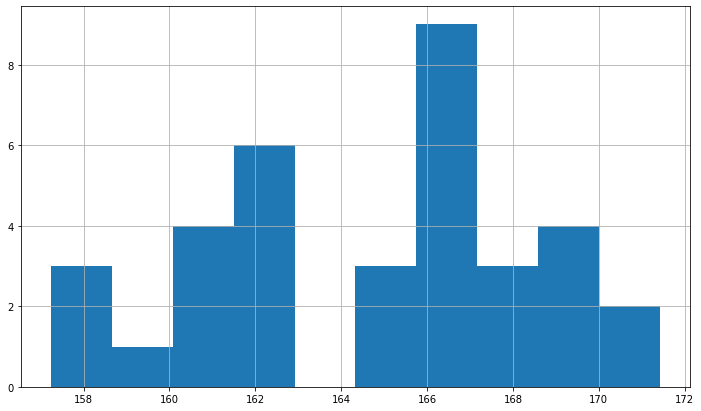

In [9]:
df[df['Volume'] > 300000]['Close'].hist()

In [10]:
str(datetime.datetime.today()).split()[0]


'2021-11-13'

In [11]:
str(datetime.datetime.today()- datetime.timedelta(days=1)).split()[0]


'2021-11-12'